In [35]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [37]:
%%R 
# My commonly used R imports

require('tidyverse')

In [38]:
%%R
 
# Import data with R
df <- read_csv('combinedwithcensus.csv', show_col_types = FALSE)
df

# A tibble: 2,542 × 139
   `Unnamed: 0` Borough   Borough/Citywide Off…¹ District School `School Name_x`
          <dbl> <chr>     <chr>                     <dbl> <chr>  <chr>          
 1            0 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 2            1 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 3            2 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 4            3 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 5            4 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 6            5 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 7            6 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 8            7 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 9            8 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
10            9 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
# ℹ 

In [39]:
data = pd.read_csv('combinedwithcensus.csv')
data['percent_hispanic_estimate'] = data['percent_hispanic_estimate'] *100

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 35 rows containing non-finite values (`stat_smooth()`). 

R[write to console]: 2: Removed 35 rows containing missing values (`geom_point()`). 



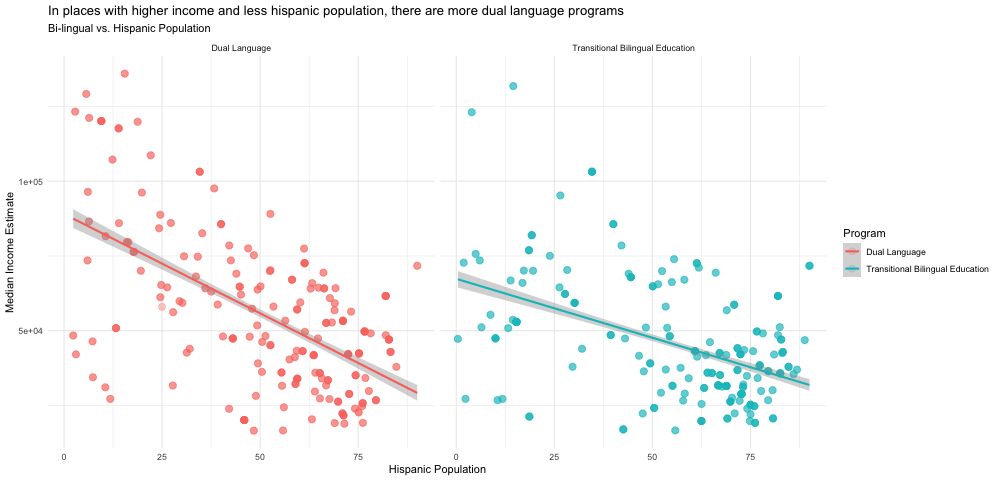

In [40]:
%%R -w 1000 -i data



# Filter for schools with programs in Spanish language only
spanish_programs_data <- data %>%
  filter(Language == "Spanish")  

# Create the scatter plot
ggplot(spanish_programs_data, aes(x = percent_hispanic_estimate, y = median_income_estimate, color = Program)) +
  geom_point(alpha = 0.2, size =3) +  # Plot points  
  geom_smooth(method = "lm") +  # Add a trend line
  labs(title = "In places with higher income and less hispanic population, there are more dual language programs",
       subtitle = "Bi-lingual vs. Hispanic Population",
       x = "Hispanic Population",
       y = "Median Income Estimate",
       color = "Program") +
  theme_minimal() +  # Use a minimal theme for a clean look
  facet_wrap(~Program)  # Create a separate plot for each program


In [41]:
%%R

#run the regression
lm_model <- lm(median_income_estimate ~ percent_hispanic_estimate, data = spanish_programs_data)
summary(lm_model)


Call:
lm(formula = median_income_estimate ~ percent_hispanic_estimate, 
    data = spanish_programs_data)

Residuals:
   Min     1Q Median     3Q    Max 
-50068 -13339  -2837  12602  65666 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               78549.22    1117.93   70.26   <2e-16 ***
percent_hispanic_estimate  -532.21      19.21  -27.70   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20020 on 1965 degrees of freedom
  (35 observations deleted due to missingness)
Multiple R-squared:  0.2808,	Adjusted R-squared:  0.2805 
F-statistic: 767.4 on 1 and 1965 DF,  p-value: < 2.2e-16

